The central question is which states in the continental US have the worst drivers based on fatal collisions. We also want to look at which states have lost the most money. We hypothesize that Texas will be the worst state based on our knowledge and that California will incur the most loss because they have a lot of insured drivers.

# Data Wrangling/Exploring

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import scipy.stats as stats

In [2]:
# this is the data from the github link posted on Blackboard
data = pd.read_csv("./bad-drivers.csv")

# This is census data, and the link to the data is:
# https://www.fhwa.dot.gov/policyinformation/statistics/2019/dl1c.cfm#foot1
pop = pd.read_csv("./population.csv")

In [3]:
# Removing the leading spaces and trailing spaces from the state column
data["State"].str.strip()

# Adding the total drivers column from our census data to the bad drivers dataset
data["Total Drivers"] = pop["Total Drivers"]

In [4]:
# The total drivers column is in the format of a string. 
# We cannot do calculations with a string so we need to format that column
# This section turns the strings of total drivers into an integer so that we can do calculations
data["Total Drivers"] = data["Total Drivers"].str.replace(",","")
data["Total Drivers"] = data["Total Drivers"].astype("int")

In [5]:
# Creating the ratio to score each state.
# This is created by dividing the number of drivers involved in a fatal crash by the total drivers in that state.
# Multiplied by billion in order to make the ratio in the units of per mile.
data["Ratio"] = 1000000000 * data["Number of drivers involved in fatal collisions per billion miles"] / data['Total Drivers']

In [6]:
# Standardized ratio so that the lowest normal ratio is one.
# This allows us to compare states easier, since a score of 95 will be 95 times worse than the best state.
data["Standardized Ratio"] = data["Ratio"] / data.at[4, "Ratio"]

In [7]:
# Printing out the standardized data.
data

,State,Number of drivers involved in fatal collisions per billion miles,Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding,Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired,Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted,Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents,Car Insurance Premiums ($),Losses incurred by insurance companies for collisions per insured driver ($),Total Drivers,Ratio,Standardized Ratio
0,Alabama,18.8,39,30,96,80,784.55,145.08,4026151,4669.472158,10.589448
1,Alaska,18.1,41,25,90,94,1053.48,133.93,529281,34197.335631,77.552860
2,Arizona,18.6,35,28,84,96,899.47,110.35,5369210,3464.196781,7.856120
3,Arkansas,22.4,18,26,94,95,827.34,142.39,2153929,10399.599987,23.584256
4,California,12.0,35,28,91,89,878.41,165.63,27213650,440.955182,1.000000
5,Colorado,13.6,37,28,79,95,835.50,139.91,4235384,3211.042966,7.282017
6,Connecticut,10.8,46,36,87,82,1068.73,167.02,2608061,4141.007438,9.390994
7,Delaware,16.2,38,30,87,99,1137.87,151.48,812529,19937.749914,45.214912
8,District of Columbia,5.9,34,27,100,100,1273.89,136.05,535579,11016.115270,24.982392
9,Florida,17.9,21,29,92,94,1160.13,144.18,15560628,1150.339177,2.608744


# Hypothesis Testing

Null Hypothesis - Texas will have the highest standardized ratio of fatal collisions as compared to the other lower 48 states

Alternate Hypothesis - Texas will not have the highest standardized ratio of fatal collisions as compared to the other lower 48 states

In [8]:
# One sample t-test to test if the State we selected is actually the worst drivers based on normalized fatal collisions data
# define data we would like to test and check to see what the data is for Texas
test_sample = data["Standardized Ratio"]
texas = test_sample[43]

# Perform one sample t-test against the standardized ratio for Texas.
# We want to see if another state has a true value greater than Texas
stats.ttest_1samp(a=test_sample, popmean=texas, alternative="greater", nan_policy='omit')

Ttest_1sampResult(statistic=5.698143290466809, pvalue=3.2108026950952207e-07)

We reject the null hypothesis and accept the alternative because the p-value of 3.21e-07 is much smaller than the significance level of 0.05. This means that another state has a standardized ratio significantly higher than Texas. Our original hypothesis is false.

Null Hypothesis - California will incur the most monetary insurance losses

Alternate Hypothesis - California will not incur the most monetary insurance losses

In [9]:
# One sample t-test to test if the California has the most insurance losses
# Define data we would like to test and check to see what the data is for California
test_sample2 = data["Losses incurred by insurance companies for collisions per insured driver ($)"]
cali = test_sample2[4]

# Perform one sample t-test agasint the insurance losses for California. 
# We want to see if another state has a true value greater than California
stats.ttest_1samp(a=test_sample2, popmean=cali, alternative="greater", nan_policy='omit')

Ttest_1sampResult(statistic=-8.953228005415742, pvalue=0.9999999999971044)

Since the p-value of 0.99 is greater than the alpha of 0.05, we fail to reject the null hypothesis. This means that there is not a state that has a significantly greater loss per insured driver, but does not mean that there is a state with a slightly greater loss.

# Graph 1 - Losses Incurred by Insured Drivers

In [10]:
# Reading in a shape file for the United States to plot the states
fp = "./s_08mr23.shp"
map_df = gpd.read_file(fp)
map_df.head()

,STATE,NAME,FIPS,LON,LAT,geometry
0,AL,Alabama,01,-86.82676,32.79354,"MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ..."
1,AR,Arkansas,05,-92.43920,34.89977,"POLYGON ((-91.62986 36.49921, -91.62849 36.499..."
2,AS,American Samoa,60,-170.37215,-14.26486,"MULTIPOLYGON (((-168.14924 -14.53377, -168.148..."
3,AZ,Arizona,04,-111.66457,34.29323,"POLYGON ((-110.49090 37.00361, -110.48750 37.0..."
4,CA,California,06,-119.60818,37.24537,"MULTIPOLYGON (((-118.42620 32.79973, -118.4263..."


In [11]:
# Merging my data with the shape file in order to plot with color
merge = map_df.set_index('NAME').join(data.set_index("State"))
merge.head()

,STATE,FIPS,LON,LAT,geometry,Number of drivers involved in fatal collisions per billion miles,Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding,Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired,Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted,Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents,Car Insurance Premiums ($),Losses incurred by insurance companies for collisions per insured driver ($),Total Drivers,Ratio,Standardized Ratio
NAME,,,,,,,,,,,,,,,
Alabama,AL,01,-86.82676,32.79354,"MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ...",18.8,39.0,30.0,96.0,80.0,784.55,145.08,4026151.0,4669.472158,10.589448
Arkansas,AR,05,-92.43920,34.89977,"POLYGON ((-91.62986 36.49921, -91.62849 36.499...",22.4,18.0,26.0,94.0,95.0,827.34,142.39,2153929.0,10399.599987,23.584256
American Samoa,AS,60,-170.37215,-14.26486,"MULTIPOLYGON (((-168.14924 -14.53377, -168.148...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,AZ,04,-111.66457,34.29323,"POLYGON ((-110.49090 37.00361, -110.48750 37.0...",18.6,35.0,28.0,84.0,96.0,899.47,110.35,5369210.0,3464.196781,7.856120
California,CA,06,-119.60818,37.24537,"MULTIPOLYGON (((-118.42620 32.79973, -118.4263...",12.0,35.0,28.0,91.0,89.0,878.41,165.63,27213650.0,440.955182,1.000000


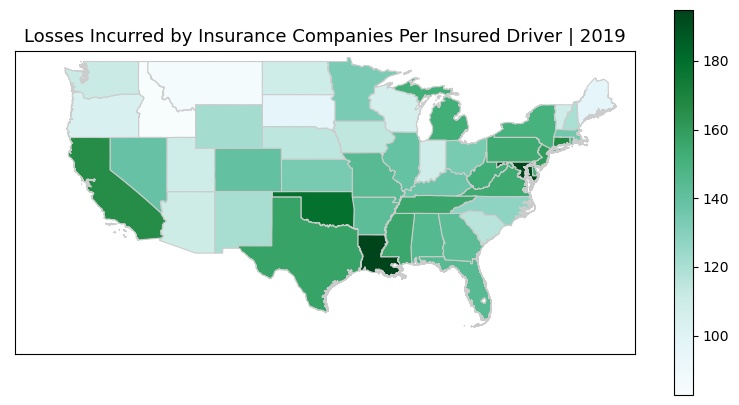

In [12]:
# Denoting the column we want to graph
var = 'Losses incurred by insurance companies for collisions per insured driver ($)'

# Setting the plot size
vmin,vmax = min(merge[var]),max(merge[var])
fig,ax = plt.subplots(1, figsize=(10,10))

# Setting the axis size to include the lower 48
ax.set_xlim(-130,-65)
ax.set_ylim(22,50)

# Plotting the map
merge.plot(column = var, cmap = 'BuGn', linewidth = 0.8, ax=ax, edgecolor = '0.8')

# Adding a legend 
sm = plt.cm.ScalarMappable(cmap = 'BuGn', norm = plt.Normalize(vmin = vmin, vmax = vmax))
sm._A = []
cbar = fig.colorbar(sm, shrink = 0.5)

# Removing the longitude and latitude
plt.xticks([])
plt.yticks([])

# Adding a title
plt.title("Losses Incurred by Insurance Companies Per Insured Driver | 2019", fontsize = 13)

#Export and save map to add to slides
fig.savefig('losses_incurred.png', dpi=300)

# Graph 2 - Number of Drivers Involved

In [13]:
# Create filepath
fp = 's_08mr23.shp'
#Read in the shape file
map_df = gpd.read_file(fp)

# Merge the map data and the driving data
merged = map_df.set_index('NAME').join(data.set_index('State'))
merged.head()

,STATE,FIPS,LON,LAT,geometry,Number of drivers involved in fatal collisions per billion miles,Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding,Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired,Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted,Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents,Car Insurance Premiums ($),Losses incurred by insurance companies for collisions per insured driver ($),Total Drivers,Ratio,Standardized Ratio
NAME,,,,,,,,,,,,,,,
Alabama,AL,01,-86.82676,32.79354,"MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ...",18.8,39.0,30.0,96.0,80.0,784.55,145.08,4026151.0,4669.472158,10.589448
Arkansas,AR,05,-92.43920,34.89977,"POLYGON ((-91.62986 36.49921, -91.62849 36.499...",22.4,18.0,26.0,94.0,95.0,827.34,142.39,2153929.0,10399.599987,23.584256
American Samoa,AS,60,-170.37215,-14.26486,"MULTIPOLYGON (((-168.14924 -14.53377, -168.148...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,AZ,04,-111.66457,34.29323,"POLYGON ((-110.49090 37.00361, -110.48750 37.0...",18.6,35.0,28.0,84.0,96.0,899.47,110.35,5369210.0,3464.196781,7.856120
California,CA,06,-119.60818,37.24537,"MULTIPOLYGON (((-118.42620 32.79973, -118.4263...",12.0,35.0,28.0,91.0,89.0,878.41,165.63,27213650.0,440.955182,1.000000


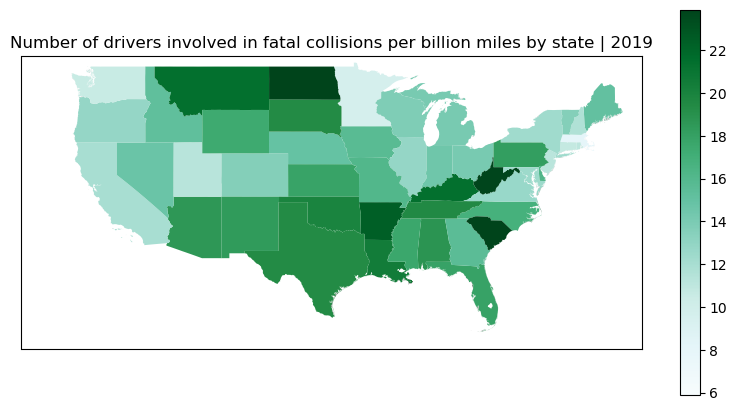

In [14]:
# The column I would like to call
variable = 'Number of drivers involved in fatal collisions per billion miles'
# Color range, based on min and max values from the chosen column 
vmin, vmax = min(data[variable]), max(data[variable])	

# Creating the main map
fig, ax = plt.subplots(figsize=(10, 10))
merged.plot(column = variable, ax=ax, cmap='BuGn')
# These are the coordinates to include the states we would like IE: Continental US
ax.set_xlim(-130, -65)
ax.set_ylim(23, 50)
# Get rid axis ticks, its just the long and lat
plt.xticks([])
plt.yticks([])
ax.set_title("Number of drivers involved in fatal collisions per billion miles by state | 2019")

# Create colorbar for a legend
sm = plt.cm.ScalarMappable(cmap='BuGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# Add Colorbar, shrink to size
cbar = fig.colorbar(sm, shrink = .5)
#Export and save map to add to slides
fig.savefig('drivers_involved.png', dpi=300)

# Graph 3 - Standardized Ratio Data

In [15]:
# opening the .shp file which contains the data to be plotted on the map
df = gpd.read_file("./s_08mr23.shp")
# df.head()
# selecting the columns required
df = df[['NAME', 'STATE']]
# renaming the column name
data = df.rename(index=str, columns={'NAME': 'NAME','STATE': 'State'})

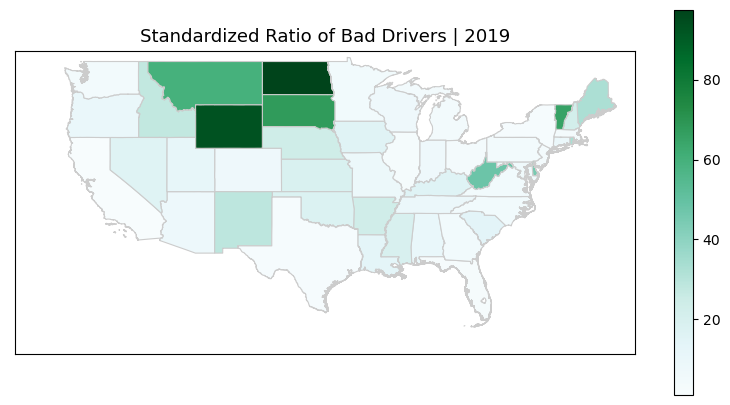

In [17]:
# Reading in a shape file for the United States to plot the states
fp = "./s_08mr23.shp"
map_df = gpd.read_file(fp)

# Denoting the column we want to graph
var = 'Standardized Ratio'

# Setting the plot size
vmin,vmax = min(merge[var]),max(merge[var])
fig,ax = plt.subplots(1, figsize=(10,10))

# Setting the axis size to include the lower 48
ax.set_xlim(-130,-65)
ax.set_ylim(22,50)

# Plotting the map
merge.plot(column = var, cmap = 'BuGn', linewidth = 0.8, ax=ax, edgecolor = '0.8')

# Adding a legend 
sm = plt.cm.ScalarMappable(cmap = 'BuGn', norm = plt.Normalize(vmin = vmin, vmax = vmax))
sm._A = []
cbar = fig.colorbar(sm, shrink = 0.5)

# Removing the longitude and latitude
plt.xticks([])
plt.yticks([])

# Adding a title
plt.title("Standardized Ratio of Bad Drivers | 2019", fontsize = 13)

#Export and save map to add to slides
fig.savefig('standardized_ratio.png', dpi=300)